<font size="5">EDA and Hypothesis testing on Insurance dataset</font>

<font size="5">Author: Suresh Venkatesan</font>

<font size="5">Objective: Exploratory data analysis and hypothesis testing on insurance dataset</font>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1.-Import-necessary-libraries" data-toc-modified-id="1.-Import-necessary-libraries-1">1. Import necessary libraries</a></span></li><li><span><a href="#2.-Read-the-data-as-a-data-frame" data-toc-modified-id="2.-Read-the-data-as-a-data-frame-2">2. Read the data as a data frame</a></span></li><li><span><a href="#3.-Basic-EDA-on-dataset" data-toc-modified-id="3.-Basic-EDA-on-dataset-3">3. Basic EDA on dataset</a></span><ul class="toc-item"><li><span><a href="#3.a.-Shape-of-the-data" data-toc-modified-id="3.a.-Shape-of-the-data-3.1">3.a. Shape of the data</a></span></li><li><span><a href="#3.b.-Data-Type-of-each-attribute" data-toc-modified-id="3.b.-Data-Type-of-each-attribute-3.2">3.b. Data Type of each attribute</a></span></li><li><span><a href="#3.c.-Checking-the-presence-of-missing-values" data-toc-modified-id="3.c.-Checking-the-presence-of-missing-values-3.3">3.c. Checking the presence of missing values</a></span></li><li><span><a href="#3.d.-5-point-summary-of-numerical-attributes" data-toc-modified-id="3.d.-5-point-summary-of-numerical-attributes-3.4">3.d. 5-point summary of numerical attributes</a></span></li><li><span><a href="#3.e.-Distribution-of-'age',-'bmi'-and-'charges'-columns" data-toc-modified-id="3.e.-Distribution-of-'age',-'bmi'-and-'charges'-columns-3.5">3.e. Distribution of 'age', 'bmi' and 'charges' columns</a></span></li><li><span><a href="#3.f.-Measure-of-skewness-of-‘bmi’,-‘age’-and-‘charges’-columns" data-toc-modified-id="3.f.-Measure-of-skewness-of-‘bmi’,-‘age’-and-‘charges’-columns-3.6">3.f. Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns</a></span><ul class="toc-item"><li><span><a href="#3.f.1.-Based-on-box-plots" data-toc-modified-id="3.f.1.-Based-on-box-plots-3.6.1">3.f.1. Based on box plots</a></span></li><li><span><a href="#3.f.2.-Based-on-mean-and-median" data-toc-modified-id="3.f.2.-Based-on-mean-and-median-3.6.2">3.f.2. Based on mean and median</a></span></li><li><span><a href="#3.f.3.-Based-on-Fisher-Pearson-coefficient-of-skewness" data-toc-modified-id="3.f.3.-Based-on-Fisher-Pearson-coefficient-of-skewness-3.6.3">3.f.3. Based on Fisher-Pearson coefficient of skewness</a></span></li></ul></li><li><span><a href="#3.g.-Checking-presence-of-outliers-in-'age',-'bmi'-and-'charges'-columns" data-toc-modified-id="3.g.-Checking-presence-of-outliers-in-'age',-'bmi'-and-'charges'-columns-3.7">3.g. Checking presence of outliers in 'age', 'bmi' and 'charges' columns</a></span></li><li><span><a href="#3.h.-Distribution-of-categorical-columns" data-toc-modified-id="3.h.-Distribution-of-categorical-columns-3.8">3.h. Distribution of categorical columns</a></span><ul class="toc-item"><li><span><a href="#3.h.1.-Frequency-Tables-of-the-categorical-columns" data-toc-modified-id="3.h.1.-Frequency-Tables-of-the-categorical-columns-3.8.1">3.h.1. Frequency Tables of the categorical columns</a></span></li><li><span><a href="#3.h.2.-Count-plots-of-the-categorical-columns" data-toc-modified-id="3.h.2.-Count-plots-of-the-categorical-columns-3.8.2">3.h.2. Count plots of the categorical columns</a></span></li></ul></li><li><span><a href="#3.i.-Pair-plot-of-all-columns-of-the-data" data-toc-modified-id="3.i.-Pair-plot-of-all-columns-of-the-data-3.9">3.i. Pair plot of all columns of the data</a></span><ul class="toc-item"><li><span><a href="#3.i.1.-Pair-plot-with-only-numeric-columns" data-toc-modified-id="3.i.1.-Pair-plot-with-only-numeric-columns-3.9.1">3.i.1. Pair plot with only numeric columns</a></span></li><li><span><a href="#3.i.2.-Pair-plot-with-all-columns" data-toc-modified-id="3.i.2.-Pair-plot-with-all-columns-3.9.2">3.i.2. Pair plot with all columns</a></span></li></ul></li></ul></li><li><span><a href="#4.-Statistical-significance-tests" data-toc-modified-id="4.-Statistical-significance-tests-4">4. Statistical significance tests</a></span><ul class="toc-item"><li><span><a href="#4.a.-Medical-costs-vs.-smokers" data-toc-modified-id="4.a.-Medical-costs-vs.-smokers-4.1">4.a. Medical costs vs. smokers</a></span></li><li><span><a href="#4.b.-BMI-vs.-Sex" data-toc-modified-id="4.b.-BMI-vs.-Sex-4.2">4.b. BMI vs. Sex</a></span></li><li><span><a href="#4.c.-Smokers-vs.-Gender" data-toc-modified-id="4.c.-Smokers-vs.-Gender-4.3">4.c. Smokers vs. Gender</a></span></li><li><span><a href="#4.d.-BMI-vs.-women-with-different-number-of-children" data-toc-modified-id="4.d.-BMI-vs.-women-with-different-number-of-children-4.4">4.d. BMI vs. women with different number of children</a></span></li></ul></li></ul></div>

# 1. Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import scipy.stats as stats
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

sns.set(color_codes = True)
%matplotlib inline 

In [2]:
# Set some plotting options
mpl.rc('axes', labelsize = 30)
mpl.rc('xtick', labelsize = 20)
mpl.rc('ytick', labelsize = 20)
mpl.rc('legend', fontsize = 20)
mpl.rc('figure', titlesize = 40)

# 2. Read the data as a data frame

In [3]:
# Since the file is in .csv format, read_csv() command is used to read the data.
med_df = pd.read_csv('insurance_2.csv')
med_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


<font size="3"><b>The above table reveals that there are seven columns in the data</b></font>

In [4]:
# Get some descriptive statistics of all columns
med_df.describe(include = 'all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


In [5]:
# Get some high-level information about the dataset
med_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


* The above list shows that there are no null objects in any column.

# 3. Basic EDA on dataset

## 3.a. Shape of the data

In [6]:
med_df.shape

(1338, 7)

<font size="3"><b>There are 1338 entries (rows) and 7 attributes (columns)</b></font>

## 3.b. Data Type of each attribute

In [7]:
# Print the data types of all columns
med_df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

<font size="3"><b>Data Type Summary from above list</b></font>

* 'Age' and 'Children' are numeric attributes of data type: int64. 
* 'bmi' and 'charges' are numeric attributes of data type: float64.
* 'sex', 'smoker' and 'region' are categorical variables of data type: object.

<b>Note:</b> Even though 'children' is reported as a numeric attribute, it should be interpreted as a 'nominal' or 'categorical' attribute since it takes on only a few discrete values. We will convert column 'children' to an 'object' datatype below

In [8]:
med_df['children'] = med_df['children'].astype('object')
med_df.dtypes

age           int64
sex          object
bmi         float64
children     object
smoker       object
region       object
charges     float64
dtype: object

## 3.c. Checking the presence of missing values

In [9]:
med_df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

<font size="3"><b>There are no missing elements in any of the columns</b></font>

## 3.d. 5-point summary of numerical attributes

* There are three numerical attributes: 'age', 'bmi', and 'charges
* We will generate 5-point summary only for 'age', 'bmi' and 'charges' 

<b>Note:</b> Children is treated as a categorical (nominal) attribute

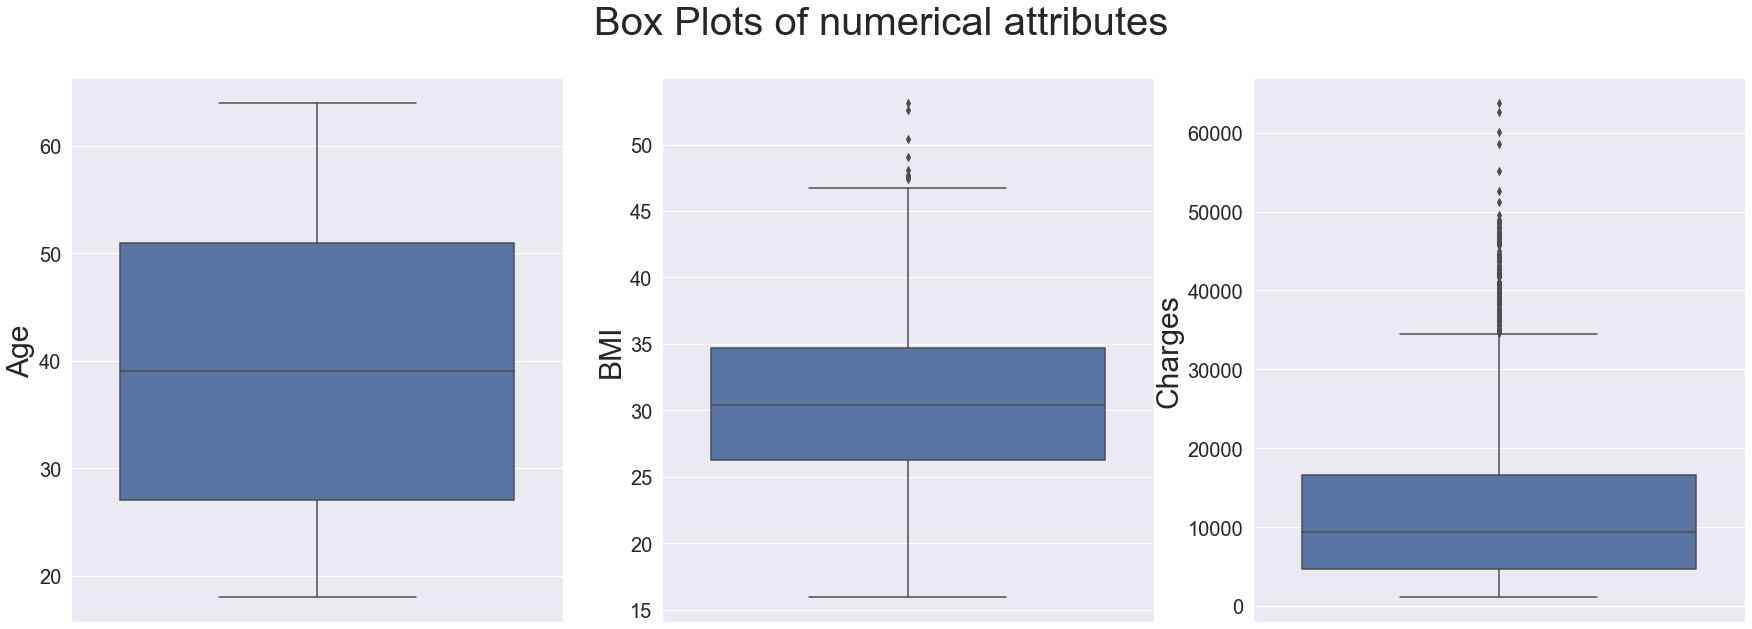

In [10]:
# First plot boxplots to get an idea of the 5-point summary
fig_1 = plt.figure(1, figsize = (30,10))
fig_1.suptitle('Box Plots of numerical attributes')

ax1 = plt.subplot(1,3,1)
sns.boxplot(y = 'age', data = med_df)
ax1.set_ylabel('Age')

ax2 = plt.subplot(1,3,2)
sns.boxplot(y = 'bmi', data = med_df)
ax2.set_ylabel('BMI')

ax3 = plt.subplot(1,3,3)
sns.boxplot(y = 'charges', data = med_df)
ax3.set_ylabel('Charges')

plt.show()

In [11]:
# Generate 5-point summary for all numeric attributes
med_df_FPS = med_df.quantile(q = [0, 0.25, 0.5, 0.75, 1], axis = 0)

# Set appropriate index names for 5-point summary table
med_df_FPS['index'] = ['Min', 'Q1', 'Q2', 'Q3', 'Max']
med_df_FPS.set_index('index', inplace = True)

# Display 5-point summary for all numeric attributes
med_df_FPS

,age,bmi,charges
index,,,
Min,18.0,15.96000,1121.873900
Q1,27.0,26.29625,4740.287150
Q2,39.0,30.40000,9382.033000
Q3,51.0,34.69375,16639.912515
Max,64.0,53.13000,63770.428010


<font size="4"><b>Inferences from five-point summary table</b></font>

<u><b>Age:</b></u>
* Age of individuals varies from 18 years to 64 years.
* Median age of all individuals is 39 years. 
* 25% of the individuals are aged below 27 years
* 25% of the individuals are aged above 51 years
* No outliers seen in the box plot.

<u><b>bmi:</b></u>
* bmi of individuals varies from 15.96 to 53.13.
* Median bmi of all individuals is 30.40. 
* 25% of the individuals have bmi below 26.296.
* 25% of the individuals have bmi above 34.694.
* Some outliers seen in the box plot.

<u><b>charges:</b></u>
* Individual medical costs varies from ~ 1121 to ~ 63770.
* Median value of medical cost is 9382. 
* 25% of the individuals have billed medical cost below 4740.
* 25% of the individuals have billed medical cost above 16640.
* Many outliers seen in the box plot.

## 3.e. Distribution of 'age', 'bmi' and 'charges' columns

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

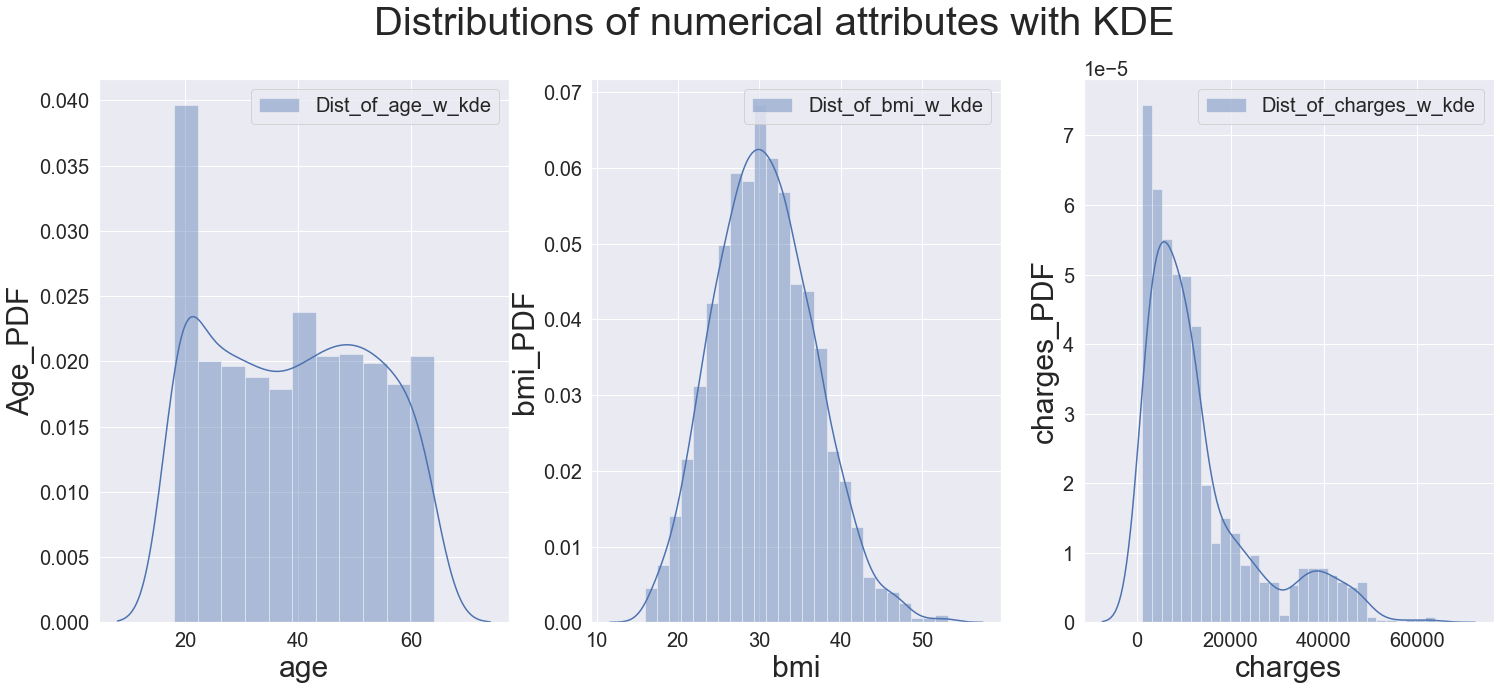

In [12]:
fig_2 = plt.figure(2, figsize = (25,10))
fig_2.suptitle('Distributions of numerical attributes with KDE', fontsize = 40)

ax1 = plt.subplot(1,3,1)
sns.distplot(med_df['age'], label = 'Dist_of_age_w_kde')
ax1.set_ylabel('Age_PDF')
ax1.legend()

ax2 = plt.subplot(1,3,2)
sns.distplot(med_df['bmi'], label = 'Dist_of_bmi_w_kde')
ax2.set_ylabel('bmi_PDF')
ax2.legend()

ax3 = plt.subplot(1,3,3)
sns.distplot(med_df['charges'], label = 'Dist_of_charges_w_kde')
ax3.set_ylabel('charges_PDF')
ax3.legend()

plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


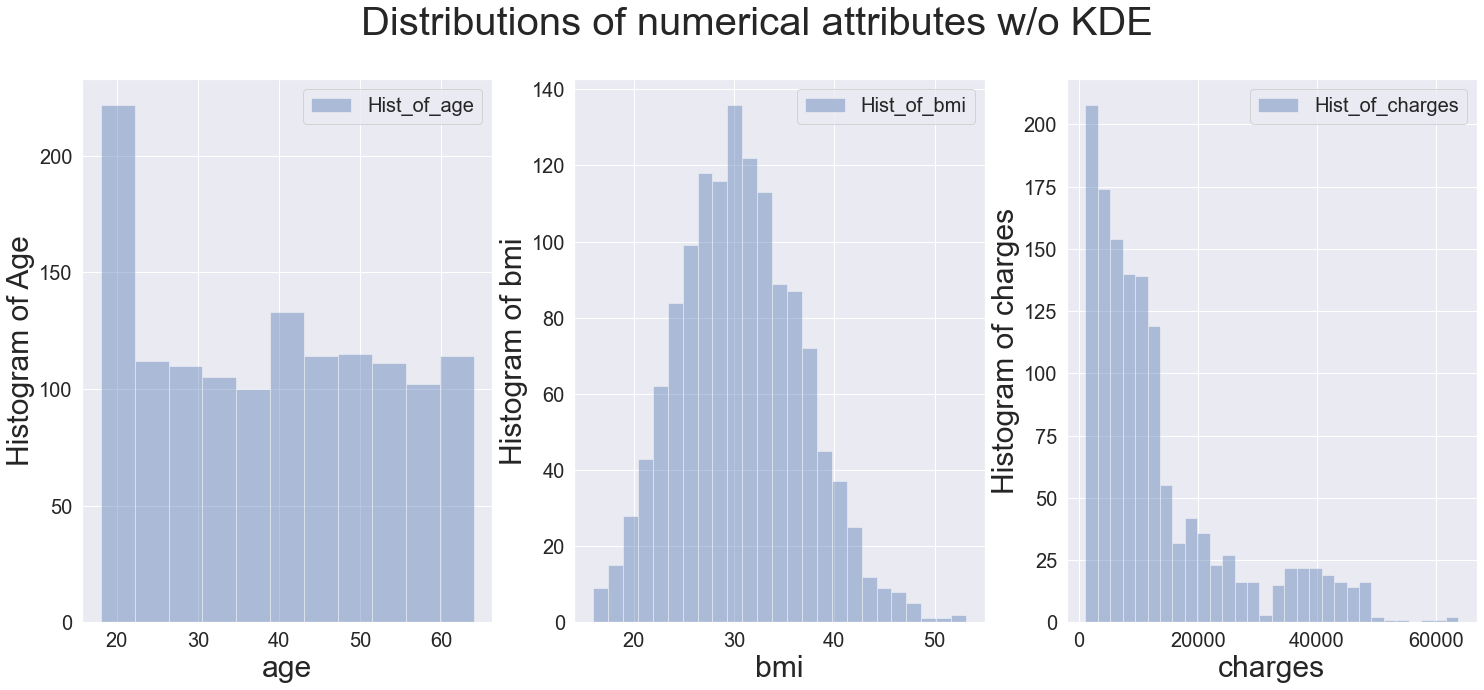

In [13]:
fig_3 = plt.figure(3, figsize = (25,10))
fig_3.suptitle('Distributions of numerical attributes w/o KDE', fontsize = 40)

ax1 = plt.subplot(1,3,1)
sns.distplot(med_df['age'], kde = False, label = 'Hist_of_age')
ax1.set_ylabel('Histogram of Age')
ax1.legend()

ax2 = plt.subplot(1,3,2)
sns.distplot(med_df['bmi'],  kde = False, label = 'Hist_of_bmi')
ax2.set_ylabel('Histogram of bmi')
ax2.legend()

ax3 = plt.subplot(1,3,3)
sns.distplot(med_df['charges'],  kde = False, label = 'Hist_of_charges')
ax3.set_ylabel('Histogram of charges')
ax3.legend()

plt.show()

<font size="4"><b>Inferences from distribution plot</b></font>

* Age of individuals is almost uniformly distributed except for the first bin.
* bmi of individuals is normally distributed with a few ouliers creating a very mild right-skew.
* Health charges are heavily right-skewed.

## 3.f. Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns

### 3.f.1. Based on box plots

* Based on the box plots plotted in 3.d, we can conclude the following:
    * Age has a symmetric (zero-skew) distribution
    * bmi also has a symmetric (zero-skew) distribution except for a few outliers which cause a very mild positive skewed (right-skewed) distribution
    * charges has a significant positive skewed (right-skewed) distribution

### 3.f.2. Based on mean and median

In [14]:
print("Mean of age is %0.2f" % med_df['age'].mean())
print("Median of age is %0.2f" % med_df['age'].median())
print("Mode of age is %0.2f" % med_df['age'].mode())
print('No skewness seen in age since mean and median are very close to each other')
print('')

print("Mean of bmi is %0.2f" % med_df['bmi'].mean())
print("Median of bmi is %0.2f" % med_df['bmi'].median())
print("Mode of bmi is %0.2f" % med_df['bmi'].mode())
print('No skewness seen in bmi since mean and median are very close to each other')
print('')

print("Mean of charges is %0.2f" % med_df['charges'].mean())
print("Median of charges is %0.2f" % med_df['charges'].median())
print("Mode of charges is %0.2f" % med_df['charges'].mode())
print('Right skewness seen in charges since mean is much higher than median and mode')

Mean of age is 39.21
Median of age is 39.00
Mode of age is 18.00
No skewness seen in age since mean and median are very close to each other

Mean of bmi is 30.66
Median of bmi is 30.40
Mode of bmi is 32.30
No skewness seen in bmi since mean and median are very close to each other

Mean of charges is 13270.42
Median of charges is 9382.03
Mode of charges is 1639.56
Right skewness seen in charges since mean is much higher than median and mode


### 3.f.3. Based on Fisher-Pearson coefficient of skewness

In [15]:
print("Skewness coefficient for age is %0.3f" % stats.skew(med_df['age'], bias = False))
print("Skewness coefficient for bmi is %0.3f" % stats.skew(med_df['bmi'], bias = False))
print("Skewness coefficient for charges is %0.3f" % stats.skew(med_df['charges'], bias = False))

Skewness coefficient for age is 0.056
Skewness coefficient for bmi is 0.284
Skewness coefficient for charges is 1.516


<b>Inference from above numbers</b>

* Based on the skewness coefficient numbers above, we can conclude that 'age' and 'bmi' are symmetric distributions and 'charges' has a significiant positive / right skew.


## 3.g. Checking presence of outliers in 'age', 'bmi' and 'charges' columns

* The box plots above indicate that there are outliers in 'bmi' and 'charges' attributes only on the higher side. There are no outliers on the lower side.
* In the code below, we will find the number of outliers for all three attributes.

In [16]:
# Obtain inter-quartile range (IQR) for all three numeric variables.
IQR = med_df_FPS.loc['Q3'] - med_df_FPS.loc['Q1']

# Obtain the min and max thresholds used to check for presence of outliers
# Min threshold = Q1 - 1.5 * IQR
# Max threshold = Q3 + 1.5 * IQR
Q1_M_1P5IQR = med_df_FPS.loc['Q1'] - 1.5*IQR
Q3_P_1P5IQR = med_df_FPS.loc['Q3'] + 1.5*IQR

# Compute number of outliers in all numeric attributes.
num_out_age  = ((med_df['age'] < Q1_M_1P5IQR['age']) | (med_df['age'] > Q3_P_1P5IQR['age'])).sum()
num_out_bmi = ((med_df['bmi'] < Q1_M_1P5IQR['bmi']) | (med_df['bmi'] > Q3_P_1P5IQR['bmi'])).sum()
num_out_charges = ((med_df['charges'] < Q1_M_1P5IQR['charges'])\
                   | (med_df['charges'] > Q3_P_1P5IQR['charges'])).sum()

print("Number of outliers in 'age' is {}".format(num_out_age))
print("Number of outliers in 'bmi' is {}".format(num_out_bmi))
print("Number of outliers in 'charges' is {}".format(num_out_charges))

Number of outliers in 'age' is 0
Number of outliers in 'bmi' is 9
Number of outliers in 'charges' is 139


## 3.h. Distribution of categorical columns

* There are four categorical attributes - 'sex', 'children', 'smoker', 'region'.
* We will use value count and count plots to get the distributions.

### 3.h.1. Frequency Tables of the categorical columns

In [17]:
print(med_df['sex'].value_counts())
print('')
print(med_df['children'].value_counts())
print('')
print(med_df['smoker'].value_counts())
print('')
print(med_df['region'].value_counts())

male      676
female    662
Name: sex, dtype: int64

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

no     1064
yes     274
Name: smoker, dtype: int64

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64


<font size="4"><b>Inferences from above tables</b></font>

* There are approximately equal number of males and females in the sample. Males slightly outnumber the number for females
* The number of children / dependents covered by health insurance is in the range of 0 to 5. This attribute follows an exponentially decaying distribution. 
* The ratio of non-smokers to smokers is close to 4.
* There are approximately equal number of individuals in all the four regions. Southeast region is represented slightly higher.

### 3.h.2. Count plots of the categorical columns

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\si

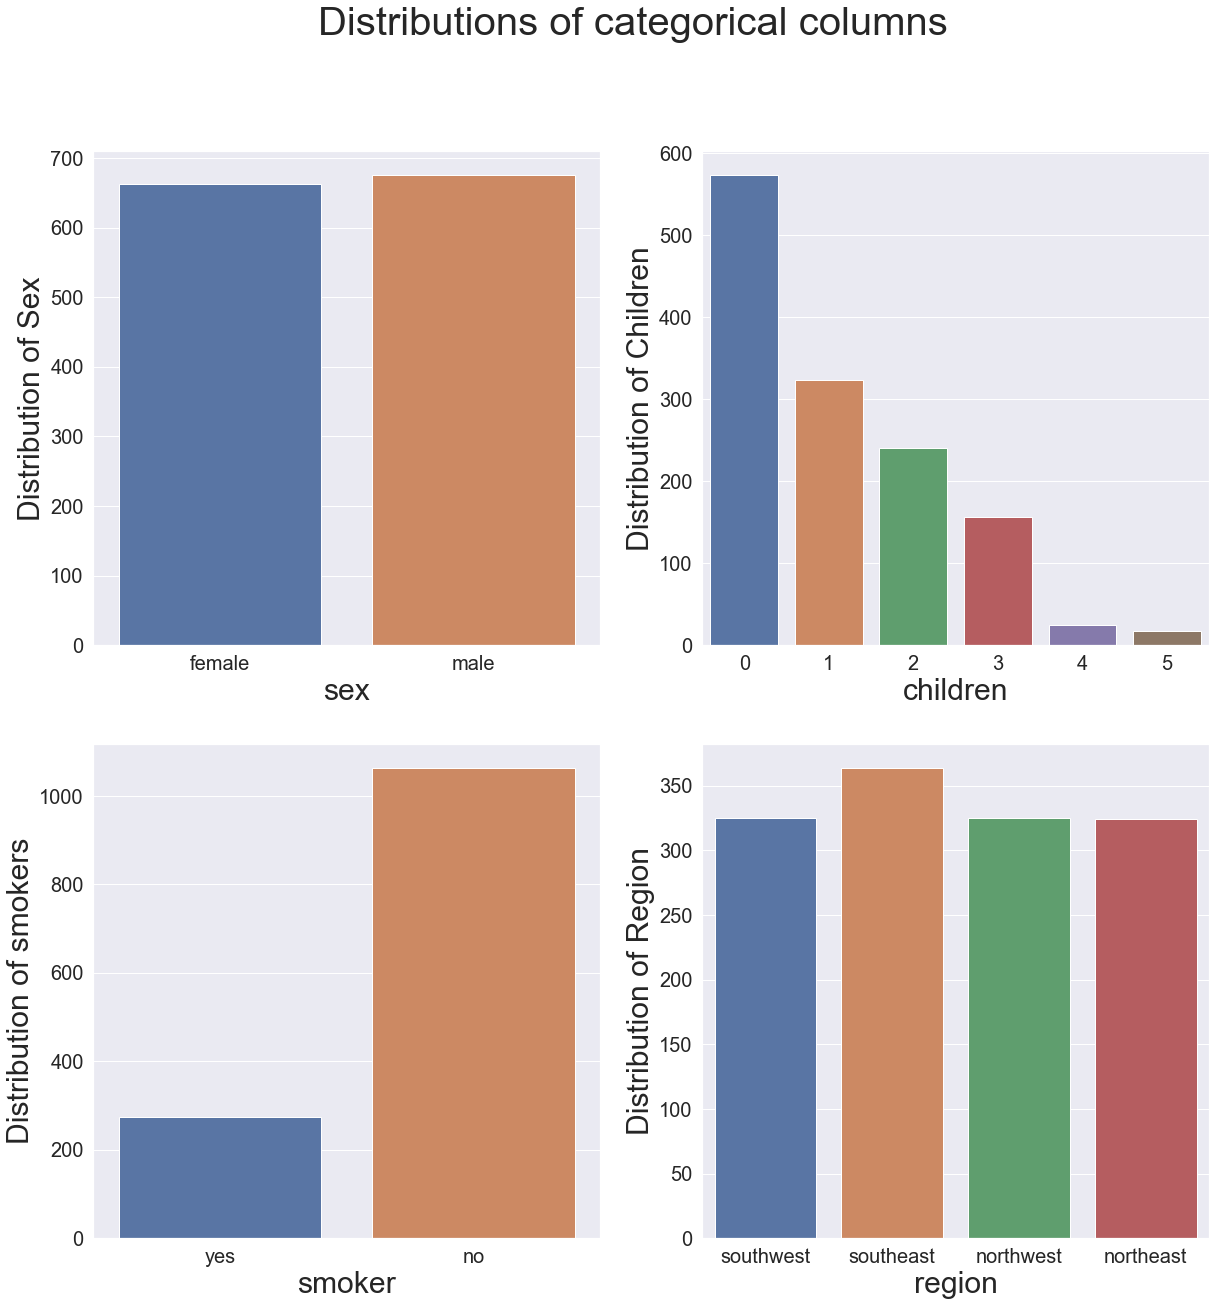

In [18]:
fig_4 = plt.figure(4, figsize = (20,20))
fig_4.suptitle('Distributions of categorical columns')

ax1 = plt.subplot(2,2,1)
sns.countplot(med_df['sex'], label = 'Dist_of_sex')
ax1.set_ylabel('Distribution of Sex')

ax2 = plt.subplot(2,2,2)
sns.countplot(med_df['children'], label = 'Dist_of_children')
ax2.set_ylabel('Distribution of Children')

ax3 = plt.subplot(2,2,3)
sns.countplot(med_df['smoker'], label = 'Dist_of_smokers')
ax3.set_ylabel('Distribution of smokers')

ax4 = plt.subplot(2,2,4)
sns.countplot(med_df['region'], label = 'Dist_of_region')
ax4.set_ylabel('Distribution of Region')

plt.show()

## 3.i. Pair plot of all columns of the data

### 3.i.1. Pair plot with only numeric columns

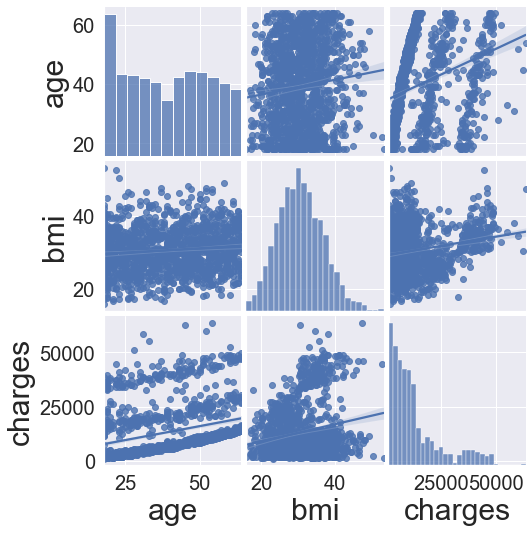

In [19]:
sns.pairplot(med_df, vars = ['age', 'bmi', 'charges'], kind = 'reg')
plt.show()

### 3.i.2. Pair plot with all columns

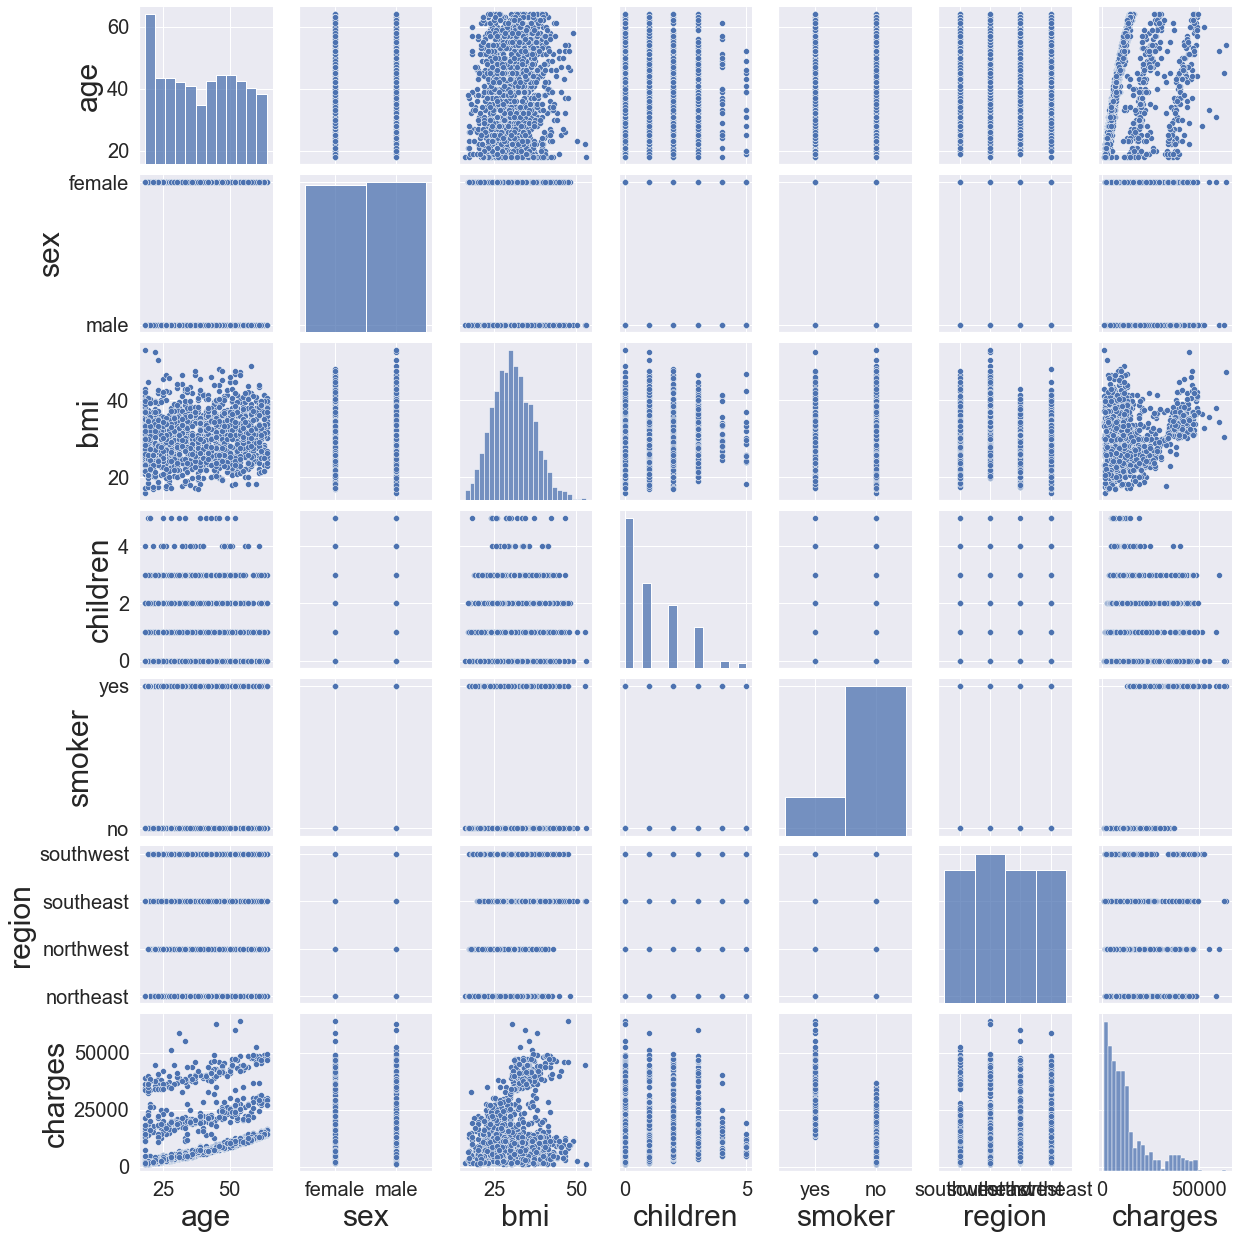

In [20]:
sns.pairplot(med_df, vars = ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'])
plt.show()

<b>Inference from above plots</b>

* There is no significant correlation observed between any pair of numeric variables in the above pair plots.
* Average charges are higher for smokers than for non-smokers.
* The only other pattern that is seen is in the 'charges' vs. 'age' scatter plot. There are three clusters of plots seen here each of which shows charges increasing with age. The three clusters might be dependent on one or several of other categorical variables.

# 4. Statistical significance tests

## 4.a. Medical costs vs. smokers

<b>Problem Statement</b>
* Do charges of people who smoke differ significantly from the people who don't?

<b>Approach</b>
* There are two populations under consideration here: individuals who smoke and those who don't. We are interested to know if the average medical costs incurred by the two groups are equal or not.

<b>Hypothesis</b>
* $\mu1$ = Average medical cost incurred by individuals who are smokers.
* $\mu2$ = Average medical cost incurred by individuals who are not smokers.
* Null Hypothesis $H_0$: $\mu1$ = $\mu2$
* Alternate Hypothesis $H_A$: $\mu1$ $\neq$ $\mu2$

<b>Test to be done</b>
* 2-sample t-test. 
* We will perform two tests:
     * Assuming population standard deviations are equal
     * Assuming population standard deviations are not equal


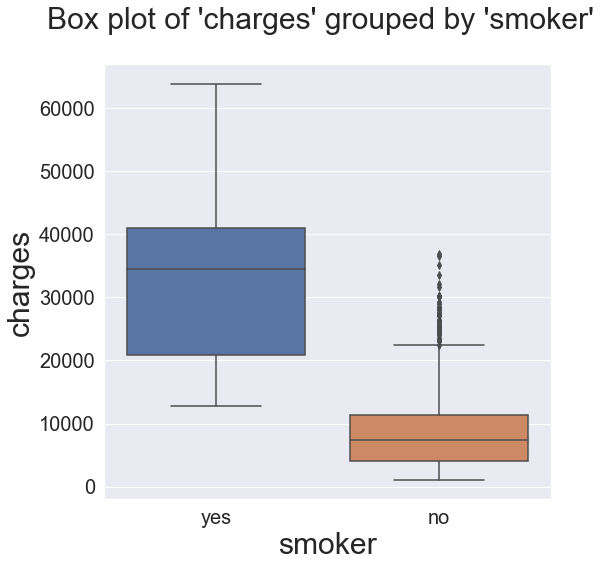

In [21]:
# First plot a box plot of 'charges' grouped together by 'smoker' attribute
fig_5 = plt.figure(5, figsize = (8,8))
fig_5.suptitle("Box plot of 'charges' grouped by 'smoker'", fontsize = 30)
ax1 = plt.subplot()
sns.boxplot(x = 'smoker', y = 'charges', data = med_df)
plt.show()

<b>Inference from above plot</b>

* The above plot clearly indicates that the medical costs incurred by smokers are higher than the medical costs incurred by non-smokers. We will now perform the hypothesis test to verify this claim.

In [22]:
# Hypothesis test
# group1 is the array of medical charges for the smokers group
# group2 is the arrary of medical charges for the non-smokers group
group1 = med_df[(med_df['smoker'] == 'yes')]['charges'] # Medical Charges for smokers
group2 = med_df[(med_df['smoker'] == 'no')]['charges'] # Medical Charges for non-smokers

# Perform 2-sample t-test assuming population variances are equal:
t_statistic, p_value = stats.ttest_ind(group1, group2, equal_var = True)
print("Population Variances assumed to be equal")
print("========================================")
print("t-statistic is %0.4f" % t_statistic)
print("p-value is %0.3e" % p_value)
print('')

# Perform 2-sample t-test assuming population variances are not equal:
t_statistic, p_value = stats.ttest_ind(group1, group2, equal_var = False)
print("Population Variances assumed to be unequal")
print("==========================================")
print("t-statistic is %0.4f" % t_statistic)
print("p-value is %0.3e" % p_value)
print('')

Population Variances assumed to be equal
t-statistic is 46.6649
p-value is 8.271e-283

Population Variances assumed to be unequal
t-statistic is 32.7519
p-value is 5.889e-103



<b>Inferences from above test</b>

* The p-value in both cases is extremely small (much less than 0.01) indicating that there is enough evidence to reject the null hypothesis even at a confidence level of 99%.
* Hence, we can safely conclude that the average charges for people who smoke **differ significantly** from the people who don't smoke.

## 4.b. BMI vs. Sex

<b>Problem Statement</b>
* Does bmi of males differ significantly from that of females?

<b>Approach</b>
* There are two populations under consideration here: males and females. We are interested to know if the bmi is same for the two groups

<b>Hypothesis</b>
* $\mu1$ = Average bmi for males.
* $\mu2$ = Average bmi for females.
* Null Hypothesis $H_0$: $\mu1$ = $\mu2$
* Alternate Hypothesis $H_A$: $\mu1$ $\neq$ $\mu2$

<b>Test to be done</b>
* 2-sample t-test. 
* We will perform two tests:
     * Assuming population standard deviations are equal
     * Assuming population standard deviations are not equal


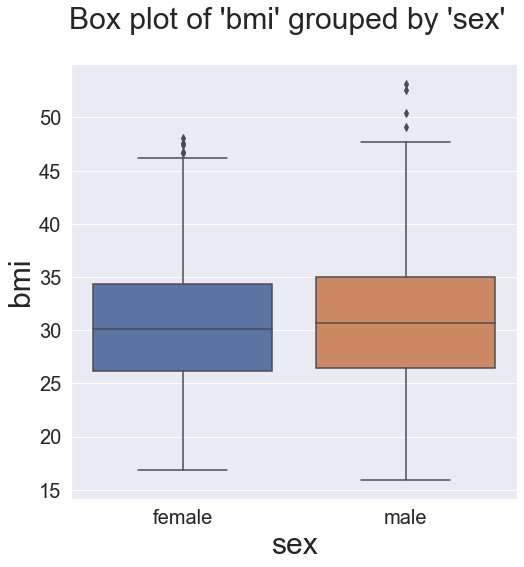

In [23]:
# First plot a box plot of 'bmi' grouped together by 'sex' attribute
fig_6 = plt.figure(6, figsize = (8,8))
fig_6.suptitle("Box plot of 'bmi' grouped by 'sex'", fontsize = 30)
ax1 = plt.subplot()
sns.boxplot(x = 'sex', y = 'bmi', data = med_df)
plt.show()

<b>Inference from above plot</b>

* The above plot seems to indicate that the average bmi for males and females are very close to each other. We will now perform the hypothesis test to verify this claim.

In [24]:
# Hypothesis test
# group3 is the array of bmi for the male group
# group4 is the arrary of bmi for the non-smokers group
group3 = med_df[(med_df['sex'] == 'male')]['bmi'] # bmi for males
group4 = med_df[(med_df['sex'] == 'female')]['bmi'] # bmi for females

# Perform 2-sample t-test assuming population variances are equal:
t_statistic, p_value = stats.ttest_ind(group3, group4, equal_var = True)
print("Population Variances assumed to be equal")
print("========================================")
print("t-statistic is %0.4f" % t_statistic)
print("p-value is %0.3f" % p_value)
print('')

# Perform 2-sample t-test assuming population variances are not equal:
t_statistic, p_value = stats.ttest_ind(group3, group4, equal_var = False)
print("Population Variances assumed to be unequal")
print("==========================================")
print("t-statistic is %0.4f" % t_statistic)
print("p-value is %0.3f" % p_value)
print('')

Population Variances assumed to be equal
t-statistic is 1.6968
p-value is 0.090

Population Variances assumed to be unequal
t-statistic is 1.6970
p-value is 0.090



<b>Inferences from above test</b>

* The p-value is 0.09 which is above 0.05. Subsequently, at a 95% confidence level, we fail to reject the null hypothesis. 
* Hence, there is <b>no statistical evidence that the bmi for males and females are different.</b>

## 4.c. Smokers vs. Gender

<b>Problem Statement</b>
* Is the proportion of smokers significantly different in different genders?

<b>Approach</b>
* There are two populations under consideration here: males and females. We are interested to know if the proportion of smokers is same for both the groups

<b>Hypothesis</b>
* p1 = Proportion of smokers for males.
* p2 = Proportion of smokers for females.
* Null Hypothesis $H_0$: p1 = p2
* Alternate Hypothesis $H_A$: p1 $\neq$ p2

<b>Test to be done</b>
* 2-sample z-test for proportions

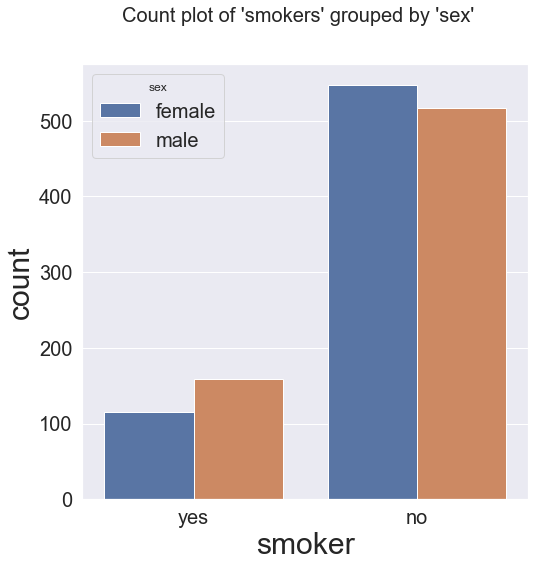

In [25]:
# First plot a count plot of 'smokers' grouped together by 'sex' attribute
fig_7 = plt.figure(7, figsize = (8,8))
fig_7.suptitle("Count plot of 'smokers' grouped by 'sex'", fontsize = 20)
ax1 = plt.subplot()
sns.countplot(x = 'smoker', hue = 'sex', data = med_df)
plt.show()

<b>Inference from above plot</b>

* From the above plot, there is a slight indication that the proportion of smokers is slightly higher for males than for females. We will now perform the hypothesis test to verify this claim.

In [26]:
num_male = med_df['sex'].value_counts()[0] # Total number of males
num_fem = med_df['sex'].value_counts()[1] # Total number of females
num_male_smokers = med_df[med_df['sex'] == 'male'].smoker.value_counts()[1] # No. of male smokers
num_fem_smokers = med_df[med_df['sex'] == 'female'].smoker.value_counts()[1] # No. of female smokers
print("Total number of males is %d" % num_male)
print("Total number of females is %d" % num_fem)
print("Total number of male smokers is %d" % num_male_smokers)
print("Total number of female smokers is %d" % num_fem_smokers)
print("Percentage of smokers in the 'male' category is is %0.2f %%"\
      % (100*num_male_smokers/num_male))
print("Percentage of smokers in the 'female' category is is %0.2f %%"\
      % (100*num_fem_smokers/num_fem))


Total number of males is 676
Total number of females is 662
Total number of male smokers is 159
Total number of female smokers is 115
Percentage of smokers in the 'male' category is is 23.52 %
Percentage of smokers in the 'female' category is is 17.37 %


In [27]:
z_statistic,p_value = proportions_ztest([num_fem_smokers, num_male_smokers], [num_fem, num_male])
print("z-statistic is %0.4f" % z_statistic)
print("p-value is %0.4f" % p_value)

z-statistic is -2.7867
p-value is 0.0053


<b>Inferences from above test</b>

* The p-value is 0.005 which is below 0.05 and even 0.01. Hence at a 95% or 99% confidence level, we reject the null hypothesis. 
* Hence, there is <b>statistical evidence that the proportion of smokers amongst men and women is different</b>.

## 4.d. BMI vs. women with different number of children

<b>Problem Statement</b>
* Is the distribution of bmi across women with no children, one child and two children, the same?

<b>Approach</b>
* There are three groups under consideration here: 
    * females with 0 children (F0).
    * females with 1 child (F1).
    * females with 2 children (F2).
* We are interested to know if the mean bmi is same for all three groups

<b>Hypothesis</b>
* $\mu1$ = Average bmi for females with 0 children.
* $\mu2$ = Average bmi for females with 1 child.
* $\mu3$ = Average bmi for females with 2 children.
* Null Hypothesis $H_0$: $\mu1$ = $\mu2$ = $\mu3$
* Alternate Hypothesis $H_A$: Atleast one of the means is not equal to the other two.

<b>Test to be done</b>
* 1-way ANOVA

In [28]:
# Create dataframe with groups in one column and bmi in another column
bmi_f0 = med_df[((med_df['sex'] == 'female') & (med_df['children'] == 0))]['bmi']
bmi_f1 = med_df[((med_df['sex'] == 'female') & (med_df['children'] == 1))]['bmi']
bmi_f2 = med_df[((med_df['sex'] == 'female') & (med_df['children'] == 2))]['bmi']

bmi_df0 = pd.DataFrame({'Group': 'F0', 'bmi': bmi_f0})
bmi_df1 = pd.DataFrame({'Group': 'F1', 'bmi': bmi_f1})
bmi_df2 = pd.DataFrame({'Group': 'F2', 'bmi': bmi_f2})

bmi_df = pd.DataFrame()
bmi_df = bmi_df.append([bmi_df0, bmi_df1, bmi_df2])
bmi_df.head()

,Group,bmi
0,F0,27.90
5,F0,25.74
9,F0,25.84
11,F0,26.29
13,F0,39.82


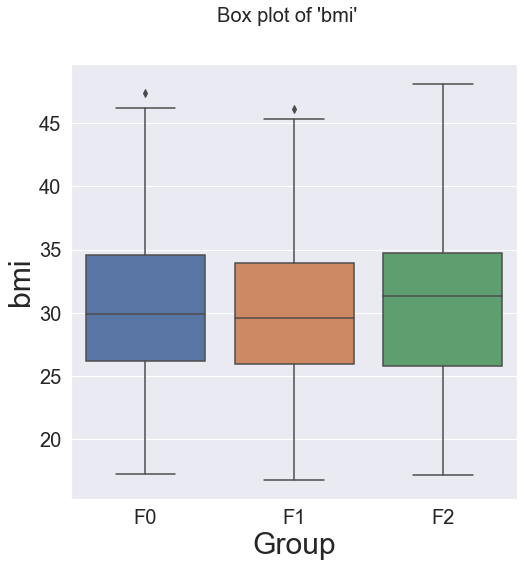

In [29]:
# First plot a box plot of 'bmi' grouped together by the three groups created above
fig_8 = plt.figure(8, figsize = (8,8))
fig_8.suptitle("Box plot of 'bmi'", fontsize = 20)
ax1 = plt.subplot()
sns.boxplot(x = 'Group', y = 'bmi', data = bmi_df)
plt.show()

<b>Inference from above plot</b>

* From the above plot, it seems like the bmi distribution is very similar for the three groups.
* Next we will do the hypothesis test.

In [30]:
# Hypothesis test
# Fit an OLS model before running ANOVA
mod = ols('bmi ~ Group', data = bmi_df).fit()

# Run ANOVA on the above model
aov_table = anova_lm(mod, typ = 2)
aov_table

,sum_sq,df,F,PR(>F)
Group,24.590123,2.0,0.334472,0.715858
Residual,20695.661583,563.0,NaN,NaN


<b>Inferences from above test</b>

* The p-value is 0.715 which is much higher then 0.05. Hence at a 95% confidence level, we fail to reject the null hypothesis. 
* Hence, there is <b>no statistical evidence that the distribution of bmi across women with no children, one child and two children are not the same</b>.